## Basic implementation of Neural Network using numpy


In [2]:
# Use the following command to install required packages

# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
class Layer:
    __slots__ = ['weights', 'biases', 'activation', 'biases_gradient', 'weights_gradient']

    def __init__(self, nodes_in, nodes_out, activation='sigmoid'):
        self.weights = np.random.normal(size=(nodes_in, nodes_out))
        self.biases = np.random.normal(size=(1, nodes_out))
        self.biases_gradient = np.zeros(self.biases.shape)
        self.weights_gradient = np.zeros(self.weights.shape)
        if activation == 'sigmoid':
            self.activation = self.sigmoid
        elif activation == 'linear':
            self.activation = self.linear

    def calculate_layer(self, input):
        """
        Calculate the output of the layer
        Takes in a numpy array and returns a numpy array
        """
        return self.activation(np.dot(input, self.weights) + self.biases)

    def sigmoid(self, x):
        """
        Sigmoid activation function
        Takes in a numpy array and returns a numpy array
        """
        return 1/(1+np.exp(-x))

    def linear(self, x):
        """
        Linear activation function
        Takes in a numpy array and returns a numpy array
        """
        return x
    
    def report_layer(self, layer_num):
        return f'Layer number {layer_num}\nWeights\n{self.weights}\nbiases\n{self.biases}'
    
    def apply_gradient(self, learning_rate):
        self.weights -= learning_rate * self.weights_gradient
        self.biases -= learning_rate * self.biases_gradient

In [5]:
class NeuralNetwork:
    __slots__ = ['hidden_layers', 'layers']

    def __init__(self, hidden_layers, input_size, output_size):
        self.hidden_layers = hidden_layers
        self.layers = []

        # Create the input layer
        input_layer = Layer(1, hidden_layers[0])
        self.layers.append(input_layer)

        # Create the hidden layers
        for input_size, output_size in zip(hidden_layers, hidden_layers[1:]):
            self.layers.append(Layer(input_size, output_size))

        # Create the output layer
        output_layer = Layer(hidden_layers[-1], 1, activation='linear')
        self.layers.append(output_layer)

    def forward(self, input):
        """
        Takes a input and returns the output of the network
        """
        for layer in self.layers:
            input = layer.calculate_layer(input)
        return input

    def train(self, input, output, learning_rate=0.01):
        """
        Train the network on a given dataset
        """
        for i in range(1000):
            self.calculate_gradient(input, output)
            self.apply_gradient(learning_rate)
            if i % 50 == 0:
                print(f'Epoch {i} MSE: {self.mean_squared_error(input, output)}')

    def backpropagation(self, input, output, learning_rate=0.1):
        """
        Perform backpropagation on the network
        """
        pass

    def mean_squared_error(self, input, output):
        """
        Calculate the mean squared error of the network on a given dataset and output
        """
        mse = []
        for i,j in zip(input, output):
            mse.append((j - self.forward(i)) ** 2)
        return np.mean(mse)

    def visualize(self):
        """
        Visualize the network architecture
        """
        for i, layer in enumerate(self.layers):
            print(layer.report_layer(i))
            print("\n")

    def apply_gradient(self, learning_rate):
        for layer in self.layers:
            layer.apply_gradient(learning_rate)

    def calculate_gradient(self, input, output):
        """
        Calculate the gradient of the network
        """
        h = 0.0001
        original_mse = self.mean_squared_error(input, output)

        for layer in self.layers:
            for i in range(layer.weights.shape[0]):
                for j in range(layer.weights.shape[1]):
                    layer.weights[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.weights_gradient[i, j] = (new_mse - original_mse) / h
                    layer.weights[i, j] -= h

            for i in range(layer.biases.shape[0]):
                for j in range(layer.biases.shape[1]):
                    layer.biases[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.biases_gradient[i, j] = (new_mse - original_mse) / h
                    layer.biases[i, j] -= h

# First set

In [11]:
square_simple = pd.read_csv('../data/regression/square-simple-training.csv', index_col=0)

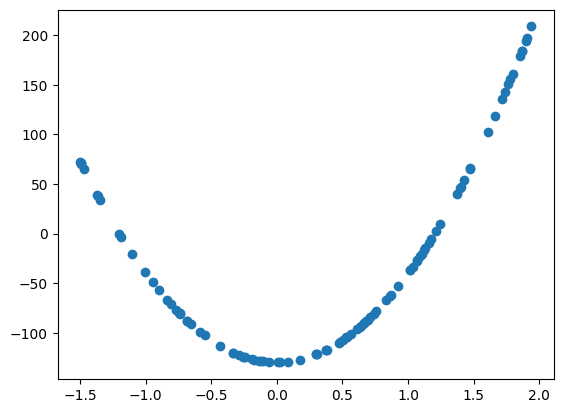

In [12]:
# scater plot of the data
plt.scatter(square_simple['x'], square_simple['y'])

In [13]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple['x'], square_simple['y'])
neural1.train(square_simple['x'], square_simple['y'])
neural1.mean_squared_error(square_simple['x'], square_simple['y'])

Epoch 0 MSE: 9162.077634735868
Epoch 50 MSE: 7519.172482756474
Epoch 100 MSE: 1958.5584309763437
Epoch 150 MSE: 1110.9329650952106
Epoch 200 MSE: 1019.1663173025462
Epoch 250 MSE: 3662.42644922285
Epoch 300 MSE: 2881.8644734355325
Epoch 350 MSE: 1111.3363331665882
Epoch 400 MSE: 876.1963564338472
Epoch 450 MSE: 1222.4761492953496
Epoch 500 MSE: 983.1979521841391
Epoch 550 MSE: 812.9069471790166
Epoch 600 MSE: 784.6869675450589
Epoch 650 MSE: 716.4982923188619
Epoch 700 MSE: 903.5266718061512
Epoch 750 MSE: 753.3495880208851
Epoch 800 MSE: 4119.974178723807
Epoch 850 MSE: 2424.0766462610545
Epoch 900 MSE: 1052.7043342483441
Epoch 950 MSE: 821.8728047212085


805.1175315324981

In [ ]:
neural2 = NeuralNetwork([10], 1, 1)
neural2.mean_squared_error(square_simple['x'], square_simple['y'])

8651.681434347322

In [ ]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.mean_squared_error(square_simple['x'], square_simple['y'])

8606.395298352227

# Second set

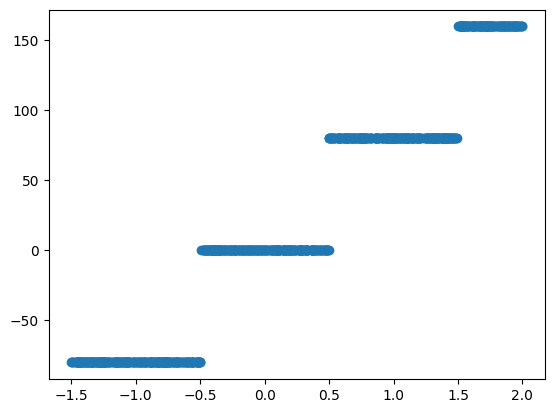

In [ ]:
steps_large = pd.read_csv("../data/regression/steps-large-test.csv", index_col=0)
plt.scatter(steps_large["x"], steps_large["y"])

In [ ]:
neural4 = NeuralNetwork([5], 1, 1)
neural4.mean_squared_error(steps_large["x"], steps_large["y"])

7520.5487516374105

In [ ]:
neural5 = NeuralNetwork([10], 1, 1)
neural5.mean_squared_error(steps_large["x"], steps_large["y"])

7496.347949200043

In [ ]:
neural6 = NeuralNetwork([5,5], 1, 1)
neural6.mean_squared_error(steps_large["x"], steps_large["y"])

7390.999517573671